In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="ticks", color_codes=True, context="notebook", font_scale=1.5)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

mainpath = '/Users/jorgetil/Astro/HITS'

In [2]:
RRLyr_TS = pd.read_csv('%s/tables/RRLyr_ts.csv'
                       % (mainpath))
RRLyr_pred = pd.read_csv('%s/tables/RRLyr_pred.csv'
                       % (mainpath))

EB_TS = pd.read_csv('%s/tables/EB_ts.csv'
                       % (mainpath))
EB_pred = pd.read_csv('%s/tables/EB_pred.csv'
                       % (mainpath))

In [3]:
RRLyr_TS.Var_subType.value_counts()

AB      95
C       31
D        1
RRab     1
Name: Var_subType, dtype: int64

In [4]:
EB_TS.Var_subType.value_counts()

EW            96
EA            13
beta lyrae     1
Name: Var_subType, dtype: int64

In [5]:
print RRLyr_TS.columns.values

['internalID' 'ID' 'raMedian' 'decMedian' 'X' 'Y' 'spCl' 'spSubCl'
 'Var_Type' 'Var_subType' 'Amplitude' 'AndersonDarling' 'Autocor_length'
 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con' 'Eta_e'
 'FluxPercentileRatioMid20' 'FluxPercentileRatioMid35'
 'FluxPercentileRatioMid50' 'FluxPercentileRatioMid65'
 'FluxPercentileRatioMid80' 'Freq1_harmonics_amplitude_0'
 'Freq1_harmonics_amplitude_1' 'Freq1_harmonics_amplitude_2'
 'Freq1_harmonics_amplitude_3' 'Freq1_harmonics_rel_phase_0'
 'Freq1_harmonics_rel_phase_1' 'Freq1_harmonics_rel_phase_2'
 'Freq1_harmonics_rel_phase_3' 'Freq2_harmonics_amplitude_0'
 'Freq2_harmonics_amplitude_1' 'Freq2_harmonics_amplitude_2'
 'Freq2_harmonics_amplitude_3' 'Freq2_harmonics_rel_phase_0'
 'Freq2_harmonics_rel_phase_1' 'Freq2_harmonics_rel_phase_2'
 'Freq2_harmonics_rel_phase_3' 'Freq3_harmonics_amplitude_0'
 'Freq3_harmonics_amplitude_1' 'Freq3_harmonics_amplitude_2'
 'Freq3_harmonics_amplitude_3' 'Freq3_harmonics_rel_phase_0'
 'Freq3_harmonics_rel

In [6]:
low_p_rr_TS = RRLyr_TS.query('PeriodLS < 0.2 and PeriodLS > 0.01')
low_p_rr_C = RRLyr_pred.query('PeriodLS < 0.2 and PeriodLS > 0.01 and RRLYR > .7')
print low_p_rr_TS.shape
print low_p_rr_C.shape

print low_p_rr_C.internalID.values
print low_p_rr_TS.internalID.values

(16, 75)
(13, 90)
['Blind14A_01_N15_0266_3363' 'Blind14A_01_S10_0178_0513'
 'Blind14A_01_S4_1318_2183' 'Blind15A_06_S3_1373_0478'
 'Blind15A_12_N15_1644_1724' 'Blind15A_19_N25_1362_3392'
 'Blind15A_29_S11_0931_2111' 'Blind15A_33_S13_0922_0687'
 'Blind15A_33_S19_0077_0665' 'Blind15A_33_S19_1145_0097'
 'Blind15A_35_S22_1612_1229' 'Blind15A_38_S20_1037_0603'
 'Blind15A_44_N8_2027_1115']
['Blind15A_47_S22_0917_3426' 'Blind15A_34_S6_0560_1540'
 'Blind15A_01_N2_0998_2555' 'Blind15A_09_S23_1077_1524'
 'Blind15A_19_N4_0938_3573' 'Blind15A_28_N18_0642_3750'
 'Blind15A_33_N6_1035_1412' 'Blind15A_33_S18_1228_3262'
 'Blind15A_34_N14_1105_1240' 'Blind15A_40_N11_0753_2072'
 'Blind15A_42_N9_0722_1415' 'Blind15A_42_S21_1410_0699'
 'Blind15A_48_N10_0409_3313' 'Blind15A_48_S10_1986_1958'
 'Blind14A_29_N6_0484_0792' 'Blind14A_34_N11_1814_2020']


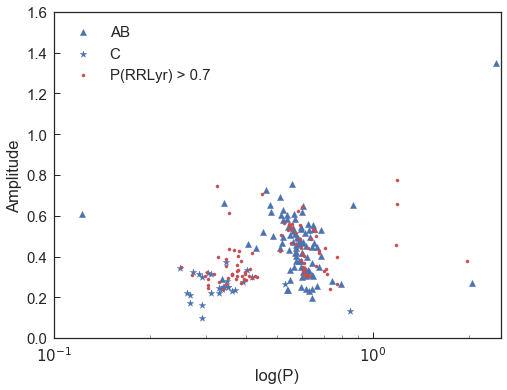

In [12]:
plt.figure(figsize=(8,6))
#plt.scatter(RRLyr_TS.PeriodGLS,
#            RRLyr_TS.Amplitude,
#            marker='.', c='k', s=40, label='')
plt.scatter(RRLyr_TS.query('Var_subType == "AB" and (PeriodGLS < .9 or PeriodGLS > 1.1)').PeriodGLS,
            RRLyr_TS.query('Var_subType == "AB" and (PeriodGLS < .9 or PeriodGLS > 1.1)').Amplitude*1,
            marker='^', c='b', s=40, label='AB')
plt.scatter(RRLyr_TS.query('Var_subType == "C" and (PeriodGLS < .9 or PeriodGLS > 1.1)').PeriodGLS,
            RRLyr_TS.query('Var_subType == "C" and (PeriodGLS < .9 or PeriodGLS > 1.1)').Amplitude*1,
            marker='*', c='b', s=50, label='C')

plt.scatter(RRLyr_pred.query('RRLYR > .7 and (PeriodGLS < .9 or PeriodGLS > 1.1)').PeriodLS,
            RRLyr_pred.query('RRLYR > .7 and (PeriodGLS < .9 or PeriodGLS > 1.1)').Amplitude*1,
            marker='.', c='r', s=40, label='P(RRLyr) > 0.7')

plt.legend(loc='upper left', fontsize='small')
plt.xscale('log')
plt.ylabel('Amplitude')
plt.xlabel('log(P)')
plt.xlim(10**(-1), 10**.4)
plt.ylim(0,1.6)
if True:
    plt.savefig('%s/figures/RRLyr_Amp_P.pdf' % (mainpath), format='pdf',
            dpi=600, bbox_inches='tight')
plt.show()

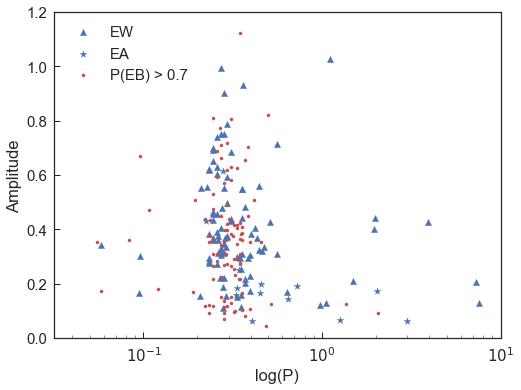

0.0287692669917 3.7951110165 0.30779511778


In [15]:
plt.figure(figsize=(8,6))
#plt.scatter(EB_TS.PeriodGLS,
#            EB_TS.Amplitude,
#            marker='^', c='b', s=40, label='TS')

plt.scatter(EB_TS.query('Var_subType == "EW"').PeriodGLS*2,
            EB_TS.query('Var_subType == "EW"').Amplitude*2,
            marker='^', c='b', s=40, label='EW')
plt.scatter(EB_TS.query('Var_subType == "EA"').PeriodGLS,
            EB_TS.query('Var_subType == "EA"').Amplitude*2,
            marker='*', c='b', s=50, label='EA')

plt.scatter(EB_pred.query('EB > .7').PeriodGLS*2,
            EB_pred.query('EB > .7').Amplitude*2,
            marker='.', c='r', s=40, label='P(EB) > 0.7')

plt.legend(loc='upper left', fontsize='small')
plt.xscale('log')
plt.ylabel('Amplitude')
plt.xlabel('log(P)')
plt.xlim(10**(-1.5), 10**1)
plt.ylim(0,1.2)
if True:
    plt.savefig('%s/figures/EB_Amp_P.pdf' % (mainpath), format='pdf',
            dpi=600, bbox_inches='tight')
plt.show()

print EB_TS.PeriodGLS.min(), EB_TS.PeriodGLS.max() , EB_TS.PeriodGLS.median()*2

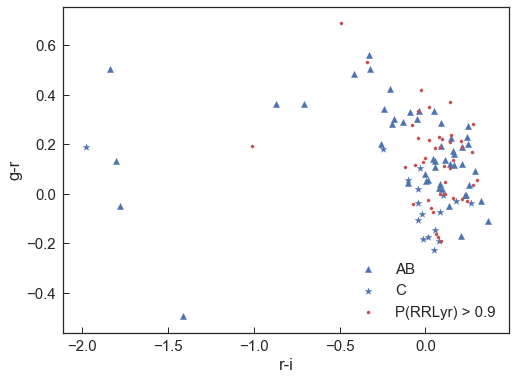

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(RRLyr_TS.query('Var_subType == "AB"')['r-i'],
            RRLyr_TS.query('Var_subType == "AB"')['g-r'],
            marker='^', c='b', s=40, label='AB')
plt.scatter(RRLyr_TS.query('Var_subType == "C"')['r-i'],
            RRLyr_TS.query('Var_subType == "C"')['g-r'],
            marker='*', c='b', s=50, label='C')

plt.scatter(RRLyr_pred.query('RRLYR > .9')['r-i'],
            RRLyr_pred.query('RRLYR > .9')['g-r'],
            marker='.', c='r', s=40, label='P(RRLyr) > 0.9')

plt.legend(loc='best', fontsize='small')
plt.ylabel('g-r')
plt.xlabel('r-i')
plt.savefig('%s/figures/RRLyr_color.pdf' % (mainpath), format='pdf',
            dpi=600, bbox_inches='tight')
plt.show()

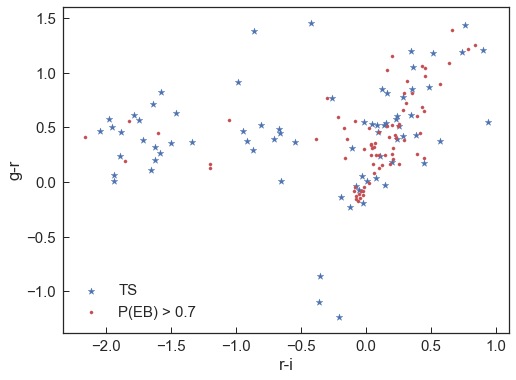

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(EB_TS['r-i'],
            EB_TS['g-r'],
            marker='*', c='b', s=50, label='TS')

#plt.scatter(EB_TS.query('Var_subType == "EW"')['r-i'],
#            EB_TS.query('Var_subType == "EW"')['g-r'],
#            marker='^', c='b', s=40, label='EW')
#plt.scatter(EB_TS.query('Var_subType == "EA"')['r-i'],
#            EB_TS.query('Var_subType == "EA"')['g-r'],
#            marker='*', c='b', s=50, label='EA')

plt.scatter(EB_pred.query('EB > .7')['r-i'],
            EB_pred.query('EB > .7')['g-r'],
            marker='.', c='r', s=40, label='P(EB) > 0.7')

plt.legend(loc='lower left', fontsize='small')
plt.ylabel('g-r')
plt.xlabel('r-i')
plt.savefig('%s/figures/EB_color.pdf' % (mainpath), format='pdf',
            dpi=600, bbox_inches='tight')
plt.show()